In [59]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy

In [61]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver import ActionChains

from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC

from tqdm import tqdm

import pandas as pd
import time

In [62]:
def configure_driver():
    # Add additional Options to the webdriver
    options = webdriver.ChromeOptions()
    # add the argument and make the browser Headless.
    # options.add_argument('--headless')
    # options.add_argument('--no-sandbox') # only colab
    # options.add_argument('--disable-dev-shm-usage') # only colab
    # Handle the service
    # service = Service(executable_path=r'/usr/bin/chromedriver')
    # Instantiate the Webdriver: Mention the executable path of the webdriver you have downloaded
    driver = webdriver.Chrome(options=options)

    #driver = webdriver.Firefox()
    return driver

In [65]:
def getText(driver, total_clicks, url):
    # https://www.pluralsight.com/search?q=web%20scraping&categories=course
    # Step 1: Go to pluralsight.com, category section with selected search keyword
    # driver.get("https://www.pluralsight.com/search?q={search_keyword}&categories=course")
    # driver.get("https://booknet.com/es/reader/una-pequena-promesa-b425858")
    # driver.get("https://booknet.com/es/reader/un-amor-para-april-b425666")
    # driver.get("https://www.allfreenovel.com/Page/Story/88872/page-1-of-Picked-by-the-Billionaire--Covington-Billionaires-/1/154")
    driver.get(url)

    timeout = 3
    count = 0
    loop_obj = tqdm(range(total_clicks))

    data = []
    for k in loop_obj:
        # loop_obj.set_description(f"Epoch: {k + 1}")
        loop_obj.set_postfix_str(f"Count error: {count}")

        # wait for the element to load
        try:
            WebDriverWait(driver, timeout*10).until(lambda s: s.find_element(By.CLASS_NAME, "pg-boilerplate").is_displayed())
        except TimeoutException:
            print("Timeout :(")
            return None
        
        # Step 2: Create a parse tree of page sources after searching
        soup = BeautifulSoup(driver.page_source, "lxml")

        # Step 3: Iterate over the search result and fetch the course
        # content = soup.select("div.px-2 div.my-2 div div")

        content = soup.find_all('p')
        # print(content)

        for text in content:
            data.append(text.get_text())
            
        """ for course_page in content:
            data.append(course_page.text) """
        
        """ try:
            element = WebDriverWait(driver, timeout).until(EC.element_to_be_clickable((By.XPATH, "//a[@class='btn btn-sm btn-info']")))
            element.click()
            count = 0
        except TimeoutException as r:
            count += 1
            if count > 5:
                break
        time.sleep(timeout) """
    return data

total_clicks = 1
# create the driver object.
driver = configure_driver()
data = getText(driver, total_clicks, "https://www.gutenberg.org/cache/epub/71725/pg71725-images.html")

100%|██████████| 1/1 [00:00<00:00,  4.29it/s, Count error: 0]


In [66]:
# close the driver.
driver.close()

In [67]:
file = open("book_summer.txt", "w")
for line in tqdm(data):
    file.write("{} \n".format(line))
file.close()

100%|██████████| 252/252 [00:00<00:00, 94287.65it/s]


In [70]:
file = open("book_summer.txt")
book = file.read()

In [71]:
def text_prep(text: str) -> str:
  return text.replace('<br />', ' ')

In [72]:
nlp = spacy.load("en_core_web_md")

In [73]:
doc = nlp(book)

In [74]:
type(doc)

spacy.tokens.doc.Doc

In [85]:
print([token for token in doc])

[Title, :, A, Summer, journey, in, the, West, 
, Author, :, Mrs., Eliza, R., Steele, 
, Release, date, :, September, 25, ,, 2023, [, eBook, #, 71725, ], 
, Language, :, English, 
, Original, publication, :, NYC, :, John, ., S., Taylor, ,, and, Co, ,, 1841, 
, Credits, :, Chuck, Greif, and, the, Online, Distributed, Proofreading, Team, at, https://www.pgdp.net, (, This, file, was, produced, from, images, generously, made, available, by, The, Internet, Archive, ), 

, LETTER, I., ,, 
 , II, ., ,, 
 , III, ., ,, 
 , IV, ., ,, 
 , V., ,, 
 , VI, ., ,, 
 , VII, ., ,, 
 , VIII, ., ,, 
 , IX, ., ,, 
 , X., ,, 
 , XI, ., 
, Numerous, typographical, errors, 
, have, been, corrected.—Etext, transcriber, ., 
 
, A, SUMMER, JOURNEY, IN, THE, WEST, ., 

, BY, 

, Mrs., STEELE, ., 





, NEW, -, YORK, ., 

, PUBLISHED, BY, JOHN, S., TAYLOR, ,, 

, 145, Nassau, Street, ., 
 
, BY, MRS, ., STEELE, ,, 
, AUTHOR, OF, HEROINES, OF, SACRED, HISTORY, ., 

, NEW, YORK, :, 
 , JOHN, S., TAYLOR, ,, AND, CO, 

In [86]:
print([token.lemma_ for token in doc])

['title', ':', 'a', 'summer', 'journey', 'in', 'the', 'West', '\n', 'author', ':', 'Mrs.', 'Eliza', 'R.', 'Steele', '\n', 'Release', 'date', ':', 'September', '25', ',', '2023', '[', 'ebook', '#', '71725', ']', '\n', 'language', ':', 'English', '\n', 'original', 'publication', ':', 'NYC', ':', 'John', '.', 'S.', 'Taylor', ',', 'and', 'Co', ',', '1841', '\n', 'credit', ':', 'Chuck', 'Greif', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', 'https://www.pgdp.net', '(', 'this', 'file', 'be', 'produce', 'from', 'image', 'generously', 'make', 'available', 'by', 'the', 'Internet', 'Archive', ')', '\n\n', 'LETTER', 'I.', ',', '\n ', 'II', '.', ',', '\n ', 'III', '.', ',', '\n ', 'IV', '.', ',', '\n ', 'V.', ',', '\n ', 'VI', '.', ',', '\n ', 'VII', '.', ',', '\n ', 'VIII', '.', ',', '\n ', 'IX', '.', ',', '\n ', 'x.', ',', '\n ', 'XI', '.', '\n', 'numerous', 'typographical', 'error', '\n', 'have', 'be', 'corrected.—Etext', 'transcriber', '.', '\n \n', 'a', 'SUMMER', 'journ

In [77]:
data = []
columns = ["text", "lemma", "pos", "tag", "dep", "shape", "is_alpha", "is_stop"]
for token in doc:
    data.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop])

df_doc = pd.DataFrame(data, columns=columns)
df_doc

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,Title,title,NOUN,NN,ROOT,Xxxxx,True,False
1,:,:,PUNCT,:,punct,:,False,False
2,A,a,DET,DT,det,X,True,True
3,Summer,summer,NOUN,NN,compound,Xxxxx,True,False
4,journey,journey,NOUN,NN,appos,xxxx,True,False
...,...,...,...,...,...,...,...,...
95122,28,28,NUM,CD,nummod,dd,False,False
95123,],],PUNCT,-RRB-,punct,],False,False
95124,Hildreth,Hildreth,PROPN,NNP,ROOT,Xxxxx,True,False
95125,.,.,PUNCT,.,punct,.,False,False


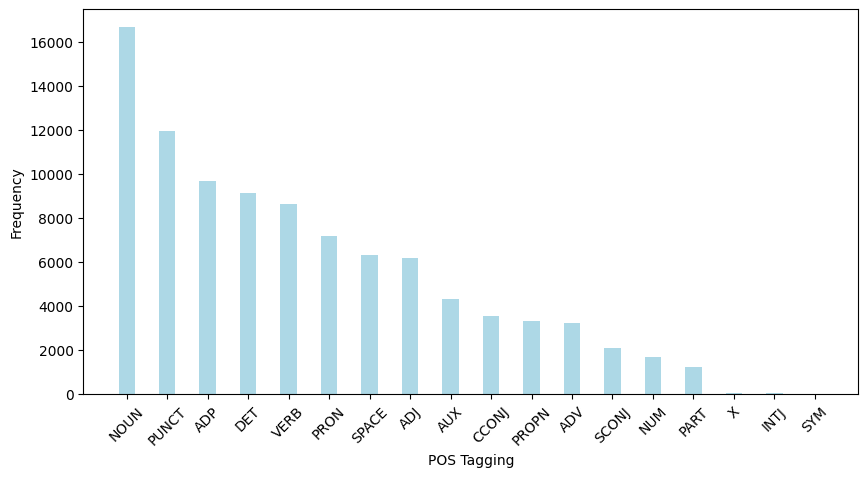

In [84]:
for col in columns:
    df_pos = df_doc[col].value_counts().to_frame()
    df_pos

    # plot
    pos = list(df_pos.index)
    values = df_pos["count"].values
    
    fig = plt.figure(figsize=(10, 5))
    
    # creating the bar plot
    plt.bar(pos, values, color='lightblue', width=0.4)

    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title("")
    plt.show()